In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import math
from scipy.stats import spearmanr #to compute spearman correlation
from scipy.stats import pearsonr #to compute pearson correlation
from scipy.stats import kendalltau #to compute kendall tau correlation

In [2]:
data_folder = './Data/' # all my data is in one folder 
path_sources_final='sources_final.csv'
path_control_grp='sources_1.csv'
path_df1='df_1.csv'
path_df2='df_2.csv'

# color palette: 
ex_palette = sns.color_palette('deep')
palette=[ex_palette[0], 'darkorange', ex_palette[2], ex_palette[7]]

In [3]:
#getting our necessary datasets
df_sources_final=pd.read_csv(data_folder + path_sources_final) #maps channel_id to extreme grp corresponding
df_1=pd.read_csv(data_folder + path_df1)
df_2=pd.read_csv(data_folder + path_df2)

In [4]:
#combining the two dataframes from the two folders 
#(should do it right from the begining? I was afraid it would slow things to have a dataframe so big)
df=pd.concat([df_1, df_2],ignore_index=True)

In [5]:
#extracting only necessary columns
df_sources=df_sources_final[["Category", "Id"]]
df_sources.rename(columns = {'Id':'channel_id'}, inplace = True)

C:\Users\HOURS\AppData\Local\Temp\ipykernel_6956\2487438044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sources.rename(columns = {'Id':'channel_id'}, inplace = True)


In [6]:
df_sources.head()

,Category,channel_id
0,Alt-lite,UCfDdlNLRVb1h3_7Xh-WhL3w
1,Alt-lite,UCso6oQ3qy7z61Fr8b0WNBMw
2,Alt-lite,UCplXdu0g94UynzYCmO2zOjw
3,Alt-lite,UCl3RCEtooHD5bhPCHJw3btA
4,Alt-lite,UCbukZErY9SjdGTHabMzY7qg


In [7]:
#checking for NaN values
print("there are", len(df_sources[df_sources.isnull().any(axis=1)]), "Nan values")

there are 0 Nan values


In [8]:
df.head()

,Unnamed: 0,video_map,view_count,upload_date,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,channel_id
0,0,0,977.0,20170920,0.136365,0.001002,0.051841,0.006676,0.056322,0.000422,0.072277,UC_7Bt0vnvdJqAwF8Ow8iT0g
1,1,1,408.0,20170905,0.014895,0.000007,0.000330,0.000946,0.000885,0.002700,0.000118,UC_7Bt0vnvdJqAwF8Ow8iT0g
2,2,2,523.0,20170828,0.034177,0.000006,0.000391,0.000210,0.017617,0.000103,0.000400,UC_7Bt0vnvdJqAwF8Ow8iT0g
3,3,3,1446.0,20170628,0.073253,0.000177,0.039672,0.005961,0.020233,0.002046,0.000521,UC_7Bt0vnvdJqAwF8Ow8iT0g
4,4,4,1859.0,20170531,0.108773,0.008326,0.049040,0.025089,0.033552,0.019227,0.009504,UC_7Bt0vnvdJqAwF8Ow8iT0g


In [9]:
#checking for NaN values
print("there are", len(df[df.isnull().any(axis=1)]), "Nan values")

there are 0 Nan values


In [10]:
#we have more channels in df than in df_sources but the difference is small

In [11]:
df_final=df.merge(df_sources, how='left', on='channel_id')
df_final.head()

,Unnamed: 0,video_map,view_count,upload_date,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,channel_id,Category
0,0,0,977.0,20170920,0.136365,0.001002,0.051841,0.006676,0.056322,0.000422,0.072277,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
1,1,1,408.0,20170905,0.014895,0.000007,0.000330,0.000946,0.000885,0.002700,0.000118,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
2,2,2,523.0,20170828,0.034177,0.000006,0.000391,0.000210,0.017617,0.000103,0.000400,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
3,3,3,1446.0,20170628,0.073253,0.000177,0.039672,0.005961,0.020233,0.002046,0.000521,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
4,4,4,1859.0,20170531,0.108773,0.008326,0.049040,0.025089,0.033552,0.019227,0.009504,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA


In [12]:
#overwriting the category for the channels belonging to the control group
df_control_=pd.read_csv(data_folder + path_control_grp) #maps channel_id to extreme grp corresponding

In [13]:
#list of channels belonging to control grp
list_control_=(df_control_[df_control_["Data Collection step"]=='control'].Id).tolist()

In [14]:
df_final.loc[df_final["channel_id"].isin(list_control_), "Category"] = 'Control'

In [15]:
#checking for NaN values
nb_Nan=len(df_final[df_final.isnull().any(axis=1)])
print("there are", nb_Nan, "Nan values which corresponds to", nb_Nan*100/len(df_final), "% of the dataframe")

there are 1998 Nan values which corresponds to 0.3853698335271755 % of the dataframe


In [16]:
#dropping NaN values
df_final.dropna(inplace=True)
nb_Nan=len(df_final[df_final.isnull().any(axis=1)])
print("there are", nb_Nan, "Nan values which corresponds to", nb_Nan*100/len(df_final), "% of the dataframe")

there are 0 Nan values which corresponds to 0.0 % of the dataframe


In [17]:
# correct the duplicated category
df_final.loc[df_final.Category == 'PUA ', 'Category'] = 'PUA'

#Notice None means "not associated to anything" and not "Nan" 
df_final.Category.value_counts()

Control                  332815
Alt-lite                  63667
Intellectual Dark Web     34252
PUA                       27717
MGTOW                     19932
NONE                      14793
Alt-right                 14208
MRA                        5613
Incel                      3468
Name: Category, dtype: int64

In [18]:
#MGTOW men going their own way, anti feminist misogynistic politic group

#MRA men's rights activist (again anti feminist)

#Incel a member of an online community of young men who consider themselves unable to attract women sexually, 
#typically associated with views that are hostile towards women and men who are sexually active:

#Pick up : online community sharing tips on how to pick up women

In [19]:
# Some lists

# selection of channel categories
list_categories = ['Alt-lite', 'Alt-right', 'Intellectual Dark Web', 'Control']
# subcategories of toxicity
list_subcat_tox = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit']
list_subcat_tox_titles = ['Severe toxicity', 'Obscene', 'Identity attack', 'Insult', 'Threat', 'Sexual explicit']
# all categories of toxicity
list_all_tox = ['toxicity'] + list_subcat_tox
list_all_tox_titles = ['Toxicity'] + list_subcat_tox_titles

#colors associated to each community
list_colors=['b','orange','g','r']
#alt-lite is |alt-right is |IDW is | Control is 

### Let's start our analysis

Now that we have our dataframe and all the values we want we can start our analysis. 
We're keeping only Alt-lite, Alt-right, Intellectual Dark Web channels and control channels. 

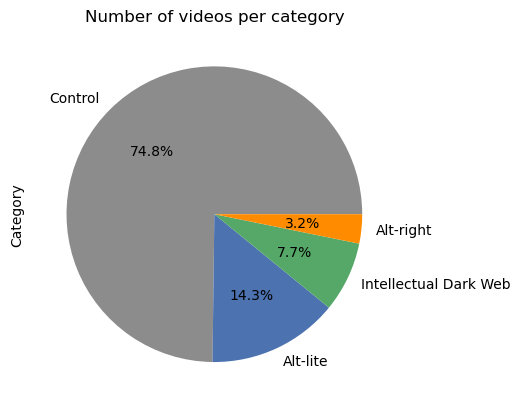

In [20]:
#getting some basic information 
colors=[palette[3], palette[0], palette[2], palette[1]]
df_extreme=df_final.loc[df_final['Category'].isin(list_categories)]
df_extreme.Category.value_counts().plot.pie(autopct='%.1f%%', colors=colors, title = "Number of videos per category")

**Comments:** We see that we have a lot of data coming associated to the category 'Control'. This is good as it reduces the variance.

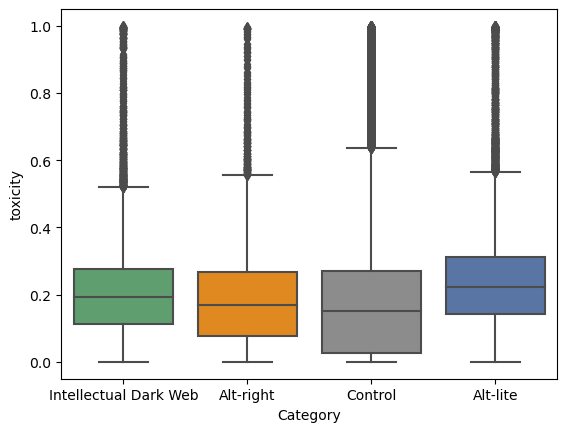

In [21]:
colors=[palette[2], palette[1], palette[3], palette[0]]
ax = sns.boxplot(x="Category", y="toxicity", data=df_extreme, palette=colors)

**Comments:** In my opinion we don't see much. 

We see that control's mean is the lowest which would mean that on average the comments made on videos belonging to Control are less toxic than the ones made on videos belonging to the other groups. But control has a large variance so it is though to compare Control to IDW and Alt-right. 

Alt-lit has the highest means and its interval \[Q_1, Q_2\] seems higher than the one for all other groups/categories.

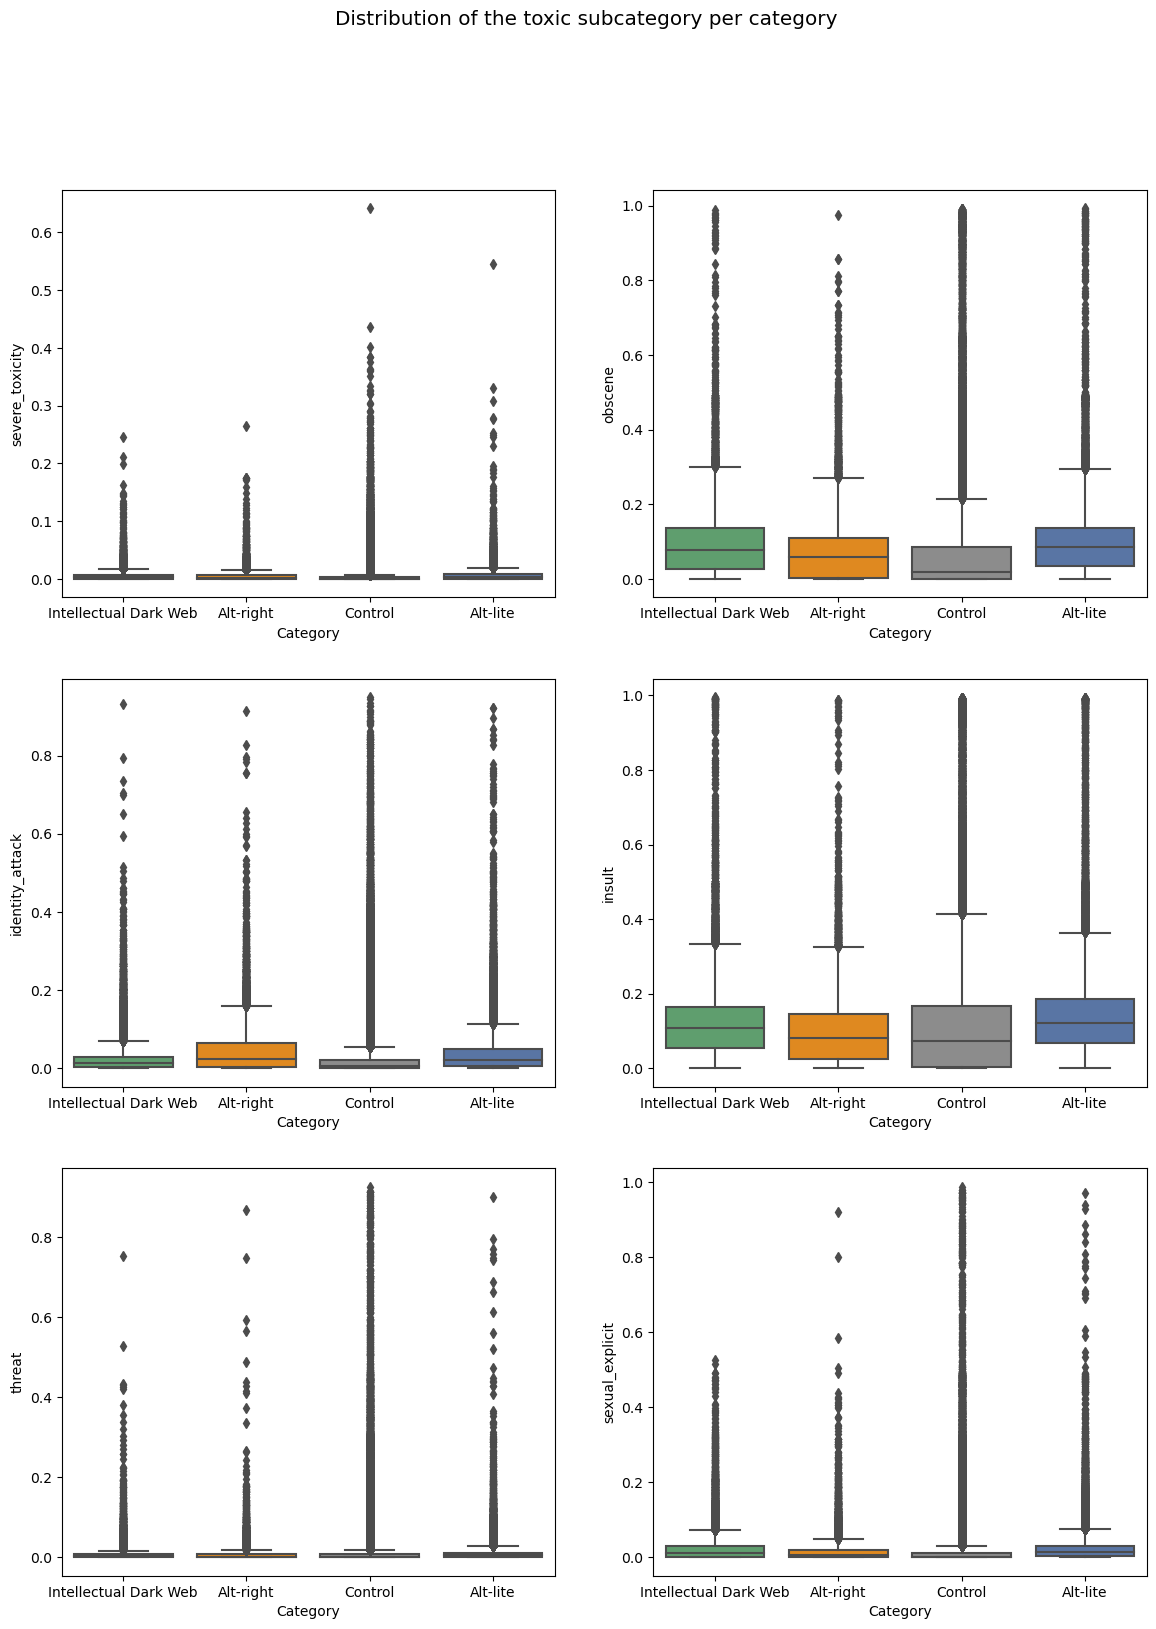

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

fig.suptitle('Distribution of the toxic subcategory per category', fontsize='x-large')

k=0

for i in range(3):
    for j in range(2):
        sns.boxplot(ax=axes[i,j], x="Category", y=list_subcat_tox[k], data=df_extreme, palette=colors)
        k+=1

**Comments:** For the subtoxicities 'threat', 'sexual_explicit', 'severe_toxicity' we don't seem as the inter-quartile interval is small.

For the subtoxicities:
- identity_attack: Alt-right highest mean, highest inter-quartile interval
- insult: Alt-lite highest mean, highest inter-quartile interval, although Control has a very large inter-quartile interval
- obscene: Control has the smallest values, Alt-lite and IDW have highest values

In [23]:
#choose one of the two displays below

Text(0, 0.6, 'Nb videos')

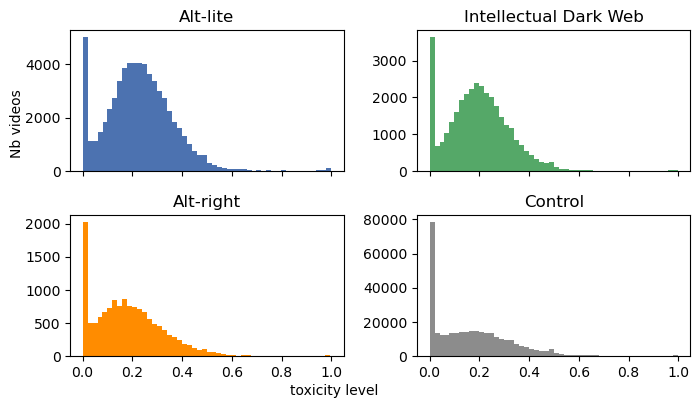

In [24]:
#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (7,4), sharey = False, sharex = True) #chose sharey=False as we are interested 
#the distribution, not the exact values

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    df=df_extreme.loc[df_extreme['Category']==list_categories[i]]
    sbplt.hist(df['toxicity'].values, bins = 50, color = palette[i])
    sbplt.set_title(list_categories[i])
    
fig.tight_layout()

fig.text(0.4,0, "toxicity level")
fig.text(0,0.6, "Nb videos", rotation = 90)

**Discusion:** They all have a right skewed distribution-> more low-toxicity score comments than high.

They all have a peak in 0 and then another one around
- 0.25 for Alt-lite
- 0.2 for IDW
- 0.18 for Alt-right
- 0.2 for Control 

Text(0, 0.6, 'Percentage of videos')

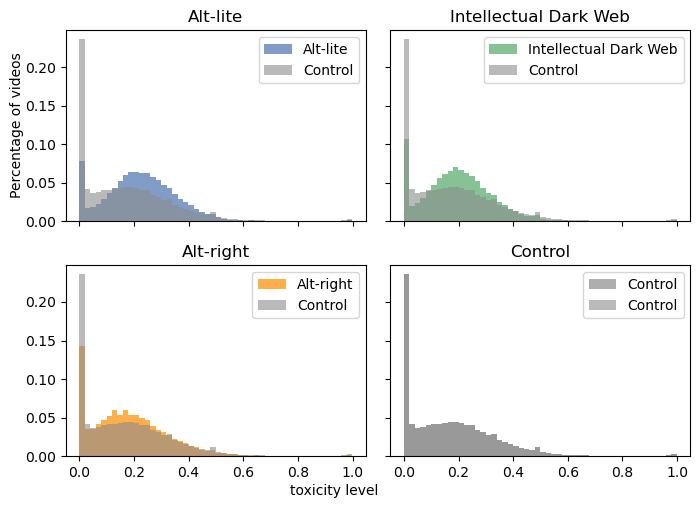

In [38]:
#same thing but with percentages (to be deleted?? discussion)

fig, ax = plt.subplots(2,2,figsize= (7,5), sharey = True, sharex = True) 

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    df=df_extreme.loc[df_extreme['Category']==list_categories[i]]
    df_control=df_extreme.loc[df_extreme['Category']==list_categories[3]]
    sbplt.hist(df['toxicity'].values, bins = 50, color = palette[i], weights=np.ones(len(df['toxicity'])) / len(df['toxicity']), alpha=0.7, label=list_categories[i])
    sbplt.hist(df_control['toxicity'].values, bins = 50, color = palette[3], weights=np.ones(len(df_control['toxicity'])) / len(df_control['toxicity']), alpha=0.6, label='Control')
    sbplt.set_title(list_categories[i])
    sbplt.legend(loc='upper right')
    
fig.tight_layout()

fig.text(0.4,0, "toxicity level")
fig.text(0,0.6, "Percentage of videos", rotation = 90)

Text(0, 0.6, 'Nb videos')

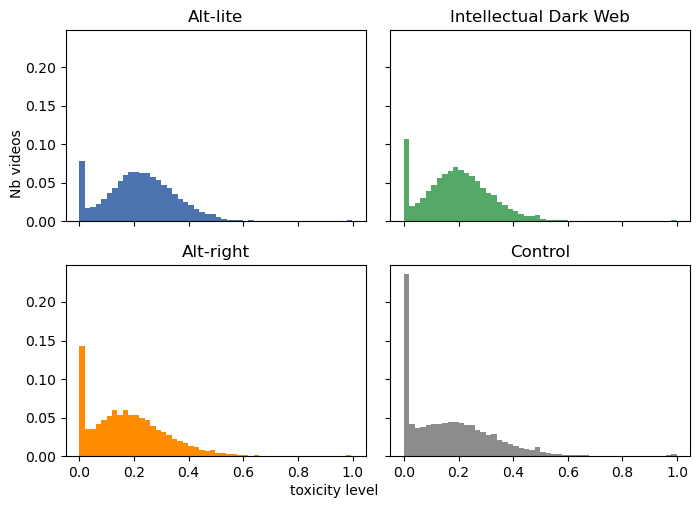

In [37]:
#same thing but with percentages (to be deleted?? discussion)

fig, ax = plt.subplots(2,2,figsize= (7,5), sharey = True, sharex = True) 

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    df=df_extreme.loc[df_extreme['Category']==list_categories[i]]
    sbplt.hist(df['toxicity'].values, bins = 50, color = palette[i], weights=np.ones(len(df['toxicity'])) / len(df['toxicity']))
    sbplt.set_title(list_categories[i])

    
fig.tight_layout()

fig.text(0.4,0, "toxicity level")
fig.text(0,0.6, "Nb videos", rotation = 90)

In [ ]:
#define an histogram for the distribution 
fig, ax = plt.subplots(len(list_subcat_tox),4,figsize= (12,10), sharey = False, sharex = True) #chose sharey=False as we are interested 
#the distribution, not the exact values

for i in range (len(list_subcat_tox)):
    for j in range(4):
        sbplt = ax[i, j]
        df=df_extreme.loc[df_extreme['Category']==list_categories[j]]
        sbplt.hist(df[list_subcat_tox[i]].values, bins = 50, color = palette[j])
        sbplt.set_title(list_categories[j]+' '+list_subcat_tox[i])
    
fig.tight_layout()

fig.text(0.4,0, "Score per toxic subcategory")
fig.text(0,0.6, "Nb videos", rotation = 90)

In [ ]:
#other idea of plotting 
list_categories_restricted = ['Alt-lite', 'Alt-right', 'Intellectual Dark Web']

for i, category in enumerate(list_categories_restricted):
    df=df_extreme.loc[df_extreme['Category']==category]
    #sets up the axis and gets histogram data
    colors = [palette[i],palette[3]]

    fig, ax1 = plt.subplots(figsize= (5,3))
    ax2 = ax1.twinx()
    ax1.hist([df['toxicity'], df_control_['toxicity']], color=colors)
    n, bins, patches = ax1.hist([df['toxicity'],df_control_['toxicity']])
    ax1.cla() #clear the axis

    #plots the histogram data
    width = (bins[1] - bins[0]) * 0.4
    bins_shifted = bins + width
    ax1.bar(bins[:-1], n[0], width, align='edge', color=colors[0],label=category)
    ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color=colors[1], label='Control')


    #finishes the plot
    ax1.set_ylabel("Nb videos", color=colors[0])
    ax2.set_ylabel("Nb videos", color=colors[1])
    ax1.set_xlabel('Toxicity')
    ax1.tick_params('y', colors=colors[0])
    ax2.tick_params('y', colors=colors[1])

    plt.tight_layout()
    ax1.legend(loc='best')
    ax2.legend(loc=(0.65,0.7))
    plt.show()

In [ ]:
#same thing but for all subcategories 

#other idea of plotting 
list_categories_restricted = ['Alt-lite', 'Alt-right', 'Intellectual Dark Web']

for j, subtoxicity in enumerate(list_subcat_tox):
    for i, category in enumerate(list_categories_restricted):
        df=df_extreme.loc[df_extreme['Category']==category]
        #sets up the axis and gets histogram data
        colors = [palette[i],palette[3]]
    
        fig, ax1 = plt.subplots(figsize= (5,3))
        ax2 = ax1.twinx()
        ax1.hist([df[subtoxicity], df_control_[subtoxicity]], color=colors)
        n, bins, patches = ax1.hist([df[subtoxicity],df_control_[subtoxicity]], bins=20)
        ax1.cla() #clear the axis

        #plots the histogram data
        width = (bins[1] - bins[0]) * 0.4
        bins_shifted = bins + width
        ax1.bar(bins[:-1], n[0], width, align='edge', color=colors[0],label=category)
        ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color=colors[1], label='Control')


        #finishes the plot
        ax1.set_ylabel("Nb videos", color=colors[0])
        ax2.set_ylabel("Nb videos", color=colors[1])
        ax1.set_xlabel(subtoxicity)
        ax1.tick_params('y', colors=colors[0])
        ax2.tick_params('y', colors=colors[1])

        plt.tight_layout()
        ax1.legend(loc='best')
        ax2.legend(loc=(0.65,0.7))
        plt.show()

**Discussion:** We see they all have a peak at 0 (the first bin), all are right skewed they all seem to have their peak (other than the one at 0) around 0.2.

That means that although they are extreme groups, the model detoxify doesn't recognize the comments being made as toxic

## Are toxicity scores and popularity correlated?

Recall that we define the popularity of a video/channel by its number of views. 

In [ ]:
#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (7,4), sharey = False, sharex = False) #chose sharey=False and sharex=False 
#as we are interested the distribution, not the exact values

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    ax[i%2, math.floor(i/2)].set_yscale('log')
    df=df_extreme.loc[df_extreme['Category']==list_categories[i]]
    sbplt.hist(df['view_count'].values, bins = 100, color = palette[i])
    sbplt.set_title(list_categories[i])
    
fig.tight_layout()

fig.text(0.4,0, "view_count")
fig.text(0,0.6, "nb_videos", rotation = 90)

We notice that the distribution is right-skewed. We take that in account when computing by creating the column "log_view_count", which is the log of the column "view_count". 

In [ ]:
df_extreme['log_view_count'] = np.log(df_extreme['view_count'])

In [ ]:
#for this part to work, in seaborn/distributions.py, function  _freedman_diaconis_bins(a) needs to be changed:
'''
def _freedman_diaconis_bins(a):
    """Calculate number of hist bins using Freedman-Diaconis rule."""
    # From https://stats.stackexchange.com/questions/798/
    a = np.asarray(a)
    if len(a) < 2:
        return 1
    iqr = np.subtract.reduce(np.nanpercentile(a, [75, 25]))
    h = 2 * iqr / (len(a) ** (1 / 3))
    # fall back to sqrt(a) bins if iqr is 0
    if h == 0:
        return int(np.sqrt(a.size))
    else:
        if np.ceil((a.max() - a.min()) / h) > 1e10:
                return 1e10
        else:
            return int(np.ceil((a.max() - a.min()) / h))
'''
#otherwise there is an issue with np.ceil((a.max() - a.min()) / h) being infinity, and not be changed to integers.

for i, category in enumerate(list_categories):
        df=df_extreme.loc[df_extreme['Category']==category]
        p = sns.jointplot(x='toxicity', y='log_view_count', data = df, kind='hex', color=palette[i],  joint_kws=dict(bins='log'))
        p.fig.suptitle(category)
        #p.ax_marg_x.remove()
        #p.ax_marg_y.remove()
        

In [ ]:
#generalization to all subtoxicities

for j, subtoxicity in enumerate(list_subcat_tox):
    for i, category in enumerate(list_categories):
        df=df_extreme.loc[df_extreme['Category']==category]
        p = sns.jointplot(x=subtoxicity, y='log_view_count', data = df, kind='hex', color=palette[i],  joint_kws=dict(bins='log'))
        p.fig.suptitle(category)
        #p.ax_marg_x.remove()
        #p.ax_marg_y.remove()
        

In [ ]:
#Spearman's correlation, how well can the data be approcimated by a monotonic function
#Pearson's correlation, how well can the data be approximated by a linear function
#Kendall Tau'correlation, how well can the data be approximated in terms of "coherant pairs" (ex: a lot of data in the top right 
#a lot in the bottom left, and none elsewhere)

for i in list_categories:
    df=df_extreme.loc[df_extreme['Category']==i]
    print(i)
    rho_1, p_1=spearmanr(df['toxicity'], df['view_count'])
    print("spearman correlation coefficient is equal to", np.round(rho_1,3), "with an associated p-value of", np.round(p_1,3))
    rho_2, p_2=pearsonr(df['toxicity'], df['view_count'])
    print("pearson correlation coefficient is equal to", np.round(rho_2,3), "with an associated p-value of", np.round(p_2,3))
    rho_3, p_3=kendalltau(df['toxicity'], df['view_count'])
    print("kendall tau correlation coefficient is equal to", np.round(rho_3,3), "with an associated p-value of", np.round(p_3,3))

In [ ]:
#generalizing to subtoxicities

for j, subtoxicity in enumerate(list_subcat_tox): 
    print('\033[1m'+subtoxicity+'\033[0m')
    for i in list_categories:
        df=df_extreme.loc[df_extreme['Category']==i]
        print('  '+i)
        rho_1, p_1=spearmanr(df[subtoxicity], df['view_count'])
        print("spearman correlation coefficient is equal to", np.round(rho_1,3), "with an associated p-value of", np.round(p_1,3))
        rho_2, p_2=pearsonr(df[subtoxicity], df['view_count'])
        print("pearson correlation coefficient is equal to", np.round(rho_2,3), "with an associated p-value of", np.round(p_2,3))
        rho_3, p_3=kendalltau(df[subtoxicity], df['view_count'])
        print("kendall tau correlation coefficient is equal to", np.round(rho_3,3), "with an associated p-value of", np.round(p_3,3))

### Only the top 25
view_count has a very skewed distribution, so the correlation that we get might be biased by the fact most videos have view_count 0. Therefore, we're studying the toxicity of the 25 most popular videos per community, where popularity is defined by its number of view_count

In [ ]:
#checking correlation and scatter plot only for top 25 videos per category

#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (14,8), sharey = False, sharex = True) #chose sharey=False as we are interested in
#the distribution, not the exact values

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    df=df_extreme.loc[df_extreme['Category']==list_categories[i]]
    df=df.sort_values('view_count', ascending=False).head(25)
    sbplt.scatter(df['toxicity'], df['view_count'], s = 200, alpha=0.7, color = palette[i])
    sbplt.set_title(list_categories[i])
    
fig.tight_layout()

fig.text(0.4,0, "toxicity", fontsize='x-large')
fig.text(0,0.4, "view_count", rotation = 90, fontsize='x-large')

In [ ]:
#checking correlation and scatter plot only for top 25 videos per category

#define an histogram for the distribution 

for j, subtoxicity in enumerate(list_subcat_tox): 
    fig, ax = plt.subplots(2,2,figsize= (14,8), sharey = False, sharex = True) #chose sharey=False as we are interested in
    #the distribution, not the exact values
    for i in range(4):
        sbplt = ax[i%2, math.floor(i/2)]
        df=df_extreme.loc[df_extreme['Category']==list_categories[i]]
        df=df.sort_values('view_count', ascending=False).head(25)
        sbplt.scatter(df[subtoxicity], df['view_count'], s = 200, alpha=0.7, color = palette[i])
        sbplt.set_title(list_categories[i])
    
    fig.tight_layout()

    fig.text(0.4,0, subtoxicity, fontsize='x-large')
    fig.text(0,0.4, "view_count", rotation = 90, fontsize='x-large')

In [ ]:
for i in list_categories:
    df=df_extreme.loc[df_extreme['Category']==i]
    df=df.sort_values('view_count', ascending=False).head(25)
    print(i)
    rho_1, p_1=spearmanr(df['toxicity'], df['view_count'])
    print("spearman correlation coefficient is equal to", np.round(rho_1,3), "with an associated p-value of", np.round(p_1,3))
    rho_2, p_2=pearsonr(df['toxicity'], df['view_count'])
    print("pearson correlation coefficient is equal to", np.round(rho_2,3), "with an associated p-value of", np.round(p_2,3))
    rho_3, p_3=kendalltau(df['toxicity'], df['view_count'])
    print("kendall tau correlation coefficient is equal to", np.round(rho_3,3), "with an associated p-value of", np.round(p_3,3))

In [ ]:
for j, subtoxicity in enumerate(list_subcat_tox): 
    print('\033[1m'+subtoxicity+'\033[0m')
    for i in list_categories:
        df=df_extreme.loc[df_extreme['Category']==i]
        df=df.sort_values('view_count', ascending=False).head(25)
        print('  '+i)
        rho_1, p_1=spearmanr(df[subtoxicity], df['view_count'])
        print("spearman correlation coefficient is equal to", np.round(rho_1,3), "with an associated p-value of", np.round(p_1,3))
        rho_2, p_2=pearsonr(df[subtoxicity], df['view_count'])
        print("pearson correlation coefficient is equal to", np.round(rho_2,3), "with an associated p-value of", np.round(p_2,3))
        rho_3, p_3=kendalltau(df[subtoxicity], df['view_count'])
        print("kendall tau correlation coefficient is equal to", np.round(rho_3,3), "with an associated p-value of", np.round(p_3,3))

Although there is a correlation the toxicity value rarely exceeds 0.5 especially when you compare to the control group it's not obvious 

## With channels instead of videos ! 

In [ ]:
#extracting channel_id and community it belongs to 
path_channel='rec_base.jsonl' #channel dataset
df_channel = pd.read_json(data_folder + path_channel, lines=True)

In [ ]:
list_view=[]
for i in range(len(df_channel)):
    s=df_channel.loc[i,"statistics"]['viewCount']
    list_view.append(float(s)) #in the dictionary it was stored as a string

In [ ]:
df_channel["channel_viewcount"]=list_view
df_channel=df_channel.drop(columns=["name", "edges", "description", "statistics"]) #only necessary columns

In [ ]:
#merge with the community data
df_channel_count=df_extreme[["channel_id", "Category", "toxicity", "severe_toxicity", 'obscene','identity_attack','insult','threat','sexual_explicit']].merge(df_channel, how='inner', on='channel_id')

In [ ]:
#group by everything and take the mean of the toxicity
df_channel_count=df_channel_count.groupby(by=["channel_id", "Category", "channel_viewcount"]).mean()
df_channel_count.reset_index(inplace=True)

In [ ]:
df_channel_count.head()

In [ ]:
#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (7,4), sharey = False, sharex = False) #chose sharey=False and sharex=False 
#as we are interested the distribution, not the exact values

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    ax[i%2, math.floor(i/2)].set_yscale('log')
    df=df_channel_count.loc[df_channel_count['Category']==list_categories[i]]
    sbplt.hist(df['channel_viewcount'].values, bins = 100, color=palette[i])
    sbplt.set_title(list_categories[i])
    
fig.tight_layout()

fig.text(0.4,0, "view_count")
fig.text(0,0.5, "Nb_videos", rotation = 90)

In [ ]:
#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (14,8), sharey = False, sharex = True) #chose sharey=False as we are interested in
#the distribution, not the exact values

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    ax[i%2, math.floor(i/2)].set_yscale('log') #plot the y axis in logarithm 
    df=df_channel_count.loc[df_channel_count['Category']==list_categories[i]]
    sbplt.scatter(df['toxicity'], df['channel_viewcount'], s = 50, alpha=1, color=palette[i])
    sbplt.set_title(list_categories[i])
    
fig.tight_layout()

fig.text(0.4,0, "toxicity", fontsize='x-large')
fig.text(0,0.4, "view_count", rotation = 90, fontsize='x-large')

In [ ]:
#define an histogram for the distribution 

for j, subtoxicity in enumerate(list_subcat_tox): 
    fig, ax = plt.subplots(2,2,figsize= (14,8), sharey = False, sharex = True) #chose sharey=False as we are interested in
    #the distribution, not the exact values

    for i in range(4):
        sbplt = ax[i%2, math.floor(i/2)]
        ax[i%2, math.floor(i/2)].set_yscale('log') #plot the y axis in logarithm 
        df=df_channel_count.loc[df_channel_count['Category']==list_categories[i]]
        sbplt.scatter(df[subtoxicity], df['channel_viewcount'], s = 50, alpha=1, color=palette[i])
        sbplt.set_title(list_categories[i])
    
    fig.tight_layout()

    fig.text(0.4,0, subtoxicity, fontsize='x-large')
    fig.text(0,0.4, "view_count", rotation = 90, fontsize='x-large')

In [ ]:
#Spearman's correlation, how well can the data be approcimated by a monotonic function
#Pearson's correlation, how well can the data be approximated by a linear function
#Kendall Tau'correlation, how well can the data be approximated in terms of "coherant pairs" (ex: a lot of data in the top right 
#a lot in the bottom left, and none elsewhere)

for i in list_categories:
    df=df_channel_count.loc[df_channel_count['Category']==i]
    print(i)
    rho_1, p_1=spearmanr(df['toxicity'], df['channel_viewcount'])
    print("spearman correlation coefficient is equal to", np.round(rho_1,3), "with an associated p-value of", np.round(p_1,3))
    rho_2, p_2=pearsonr(df['toxicity'], df['channel_viewcount'])
    print("pearson correlation coefficient is equal to", np.round(rho_2,3), "with an associated p-value of", np.round(p_2,3))
    rho_3, p_3=kendalltau(df['toxicity'], df['channel_viewcount'])
    print("kendall tau correlation coefficient is equal to", np.round(rho_3,3), "with an associated p-value of", np.round(p_3,3))

In [ ]:
#Spearman's correlation, how well can the data be approcimated by a monotonic function
#Pearson's correlation, how well can the data be approximated by a linear function
#Kendall Tau'correlation, how well can the data be approximated in terms of "coherant pairs" (ex: a lot of data in the top right 
#a lot in the bottom left, and none elsewhere)

for j, subtoxicity in enumerate(list_subcat_tox): 
    print('\033[1m'+subtoxicity+'\033[0m')
    for i in list_categories:
        df=df_channel_count.loc[df_channel_count['Category']==i]
        print('  '+i)
        rho_1, p_1=spearmanr(df['toxicity'], df['channel_viewcount'])
        print("spearman correlation coefficient is equal to", np.round(rho_1,3), "with an associated p-value of", np.round(p_1,3))
        rho_2, p_2=pearsonr(df['toxicity'], df['channel_viewcount'])
        print("pearson correlation coefficient is equal to", np.round(rho_2,3), "with an associated p-value of", np.round(p_2,3))
        rho_3, p_3=kendalltau(df['toxicity'], df['channel_viewcount'])
        print("kendall tau correlation coefficient is equal to", np.round(rho_3,3), "with an associated p-value of", np.round(p_3,3))

## Analysis of toxicity level through time

In [ ]:
# change the format of the upload date, and add a column of month created
df_extreme.upload_date = pd.to_datetime(df_extreme.upload_date, format='%Y%m%d')
df_extreme["month_created"] = df_extreme.upload_date.apply(lambda x: pd.to_datetime(x.strftime('%Y-%m')))

# all categories have data until April 2019. Therefore we consider only the data until then:
df_final_cat = df_extreme[df_extreme.upload_date < pd.to_datetime("2019-05")]

## Number of comments per month
We see in the first graph below that the data is quite noisy before 2014. Then, we show that there is more content to study from 2014, which explains why the data is not stable before. Therefore, we will only study the toxicity level from 2014 until April 2019.

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10,3))

for category in list_categories:
    sns.lineplot(x="month_created", y="toxicity", data=df_final_cat[df_final_cat['Category'] == category],
            label=category)
axs.set_ylabel("Toxicity")
axs.set_xlabel("Month")

In [ ]:
#plot number of commented videos per month per category: 
fig, axs = plt.subplots(1,1, figsize=(7,7), sharex=True)

for category in list_categories:
        df_final_cat.loc[df_final_cat['Category'] == category, 'month_created'].value_counts().plot(kind = 'line', ax=axs, logy=True)

axs.axhline(y=40, linestyle = '--', color='b')
axs.set_ylabel("Nbr of videos")
axs.set_xlabel("Date")
axs.set_title("Number of comments per channel-category over time")
axs.legend(list_categories + ['nbr videos = 40'])

From 2014, we have at least 40 comments per category per month (see horizontal line). We presume it is enough to make analysis on the overall toxicity of the comments. Therefore, from now on we will consider data from January 2014 until April 2019.

In [ ]:
df_after2014 = df_final_cat[df_final_cat.upload_date >= pd.to_datetime("2014-01")]

## Analysis: each category of toxicity
In the period defined before, we compare the toxicity levels in between each channel-category.

In [ ]:
# prints the categories of toxicity over time. 
# takes about 45 sec to run

fig, axs = plt.subplots(7,1, figsize=(12,12), sharex=True)

for index, subcat in enumerate(list_all_tox):
    for category in list_categories:
        sns.lineplot(x="month_created", y=subcat, data=df_after2014[df_after2014['Category'] == category],
            label=category, ax = axs[index])
    axs[index].set_ylabel(list_all_tox_titles[index])
    axs[index].set_xlabel("Date")
    sns.move_legend(axs[index], "upper left", bbox_to_anchor=(1, 1))

For each category of toxicity, we observe different behaviours. 
* Toxicity: alt-lite has become more toxic than other categeries.
* Severe toxicity: (SMALL SCALE!) since the results are very small, we can conclude that none of the channel-category are severly toxic.
* Obscene: all channel categories became higher than media, the control group.
* Identity attack: Alt-right on the top, then alt-lite. Then IDW has approximately the same score as the control group.
* Insult: Alt-lite is above control group.
* Threat: (SMALL SCALE!) However pick for alt-right in 2016.
* Sexual Explicit: (SMALL SCALE!) right wing is above control group. 

## Analysis: each channel-category
Now, we compare the behaviours of the toxicity features within each channel-category.

In [ ]:
fig, axs = plt.subplots(4,1, figsize=(9,12), sharex=True, sharey=True)

for i, category in enumerate(list_categories):
    for j, subcat in enumerate(list_all_tox):
        sns.lineplot(x="month_created", y=subcat, data=df_after2014[df_after2014['Category'] == category],
            label=list_all_tox_titles[j], ax = axs[i])
    axs[i].set_ylabel(list_categories[i])
    axs[i].set_xlabel("Date")
    sns.move_legend(axs[i], "upper left", bbox_to_anchor=(1, 1))

Overall the 4 channel-categories, the three main subcategories of toxicity that are signifcant are toxicity, insult and obscene.
* Alt-lite: we see a small increase of the three main subcategories mentionned above, until 2018, where a drop is observed. The values might have dropped because of the #Metoo movement, starting in 2017 as a way to draw attention on the magnitude against sexual abuse and harassment. Then the values are quite stable.
* Alt-right: an steep increase is observed mid 2016 in toxicity, insult, obscene. It coincides with the election of Donald Trump in the U.S. Indeed, June 2015, he announced that he would be a candidate in the U.S presidential election of 2016. In November 2016, he won the election. Also youtube didn't moderate the comments, following the Russian interference in the 2016 U.S. elections. We also see a pick in the first quarter of 2018. 
* IDW: rather constant.
* control: a very light increase of toxicity and insult since 2014. A decrease of obscene from 2018.

Link the behaviours to events, see hateful events of the last decade in https://www.adl.org/resources/report/decades-top-10-incidents-hate 

october 2018: Pittsburgh synagogue shooting is deadliest attack on Jews in U.S. history

## Study of the top 25 videos per month per channel-category
For each month and each channel category, we select the 25 videos with the most views and analyze their toxicity.

In [ ]:
# create the dataframe:
df_top25 = pd.DataFrame()
# create a list of all months we considered: 
list_dates = df_after2014.month_created.unique()

for i, category in enumerate(list_categories):
    df_category=df_after2014.loc[df_after2014['Category'] == category]
    for j, date in enumerate(list_dates):
        df = df_category.loc[df_category['month_created'] == date]
        if i==0 and j==0:
            df_top25 = df.sort_values('view_count', ascending=False).head(25)
        else:
            df_top25 = pd.concat([df_top25, df.sort_values('view_count', ascending=False).head(25)])
            
df_top25.head()

In [ ]:
# prints the categories of toxicity over time. We compare them with the mean obtained over all videos of the month.

fig, axs = plt.subplots(7,1, figsize=(12,16), sharex=True)

for index, subcat in enumerate(list_all_tox):
    for j, category in enumerate(list_categories):
        sns.lineplot(x="month_created", y=subcat, data=df_top25[df_top25['Category'] == category],
            label=category + " (top 25)", ax = axs[index], color = palette[j])
        sns.lineplot(x="month_created", y=subcat, data=df_after2014[df_after2014['Category'] == category],
            label=category, ax = axs[index], color = palette[j], linestyle='--', ci=None, linewidth = 1)
    axs[index].set_ylabel(list_all_tox_titles[index])
    axs[index].set_xlabel("Date")
    sns.move_legend(axs[index], "upper left", bbox_to_anchor=(1, 1))

Looking at each subcategory of toxicity, the top 25 videos have usually the same or a higher mean that the overall mean of their corresponding category. That means that the videos with the most views are usually more toxic. 
However, this is not true for the control group: the most viewed videos in the control group are usually less toxic than the mean of all the videos in the control group. 

From there, we observe a really different behaviour comparing the control group and the right wing categories. 

In [ ]:
# prints the subcategories of toxicity per channel-category
# takes about 1 min
fig, axs = plt.subplots(4,1, figsize=(9,15), sharex=True, sharey=True)

for i, category in enumerate(list_categories):
    for j, subcat in enumerate(list_all_tox):
        sns.lineplot(x="month_created", y=subcat, data=df_top25[df_top25['Category'] == category],
            label=list_all_tox_titles[j] + " (top 25)", ax = axs[i], color = palette[j])
        sns.lineplot(x="month_created", y=subcat, data=df_after2014[df_after2014['Category'] == category],
            label=list_all_tox_titles[j], ax = axs[i], color = palette[j], linestyle='--', errorbar=None, linewidth = 1)
    axs[i].set_ylabel(list_categories[i])
    axs[i].set_xlabel("Date")
    sns.move_legend(axs[i], "upper left", bbox_to_anchor=(1, 1))

In the right wing channels, the most popular videos have a higher mean of toxicity than the rest of the videos of the category. This phenomena is not observed in the control group. On the contrary, we can observe since mid 2015 that the top 25 videos contain less toxic comments than the mean over all videos of the control category.

From there, the popular videos from the right wing channels do generate a lot more toxicity in the comments than the control group.  